In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

In [2]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities, _kl_divergence)
from sklearn.utils.extmath import _ravel

In [3]:
RS = 20150101

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [5]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [19]:
import imageio
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg.win32.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.win32.exe (27.4 MB)
Downloading: 8192/28781056 bytes (0.0%)24576/28781056 bytes (0.1%)32768/28781056 bytes (0.1%)49152/28781056 bytes (0.2%)65536/28781056 bytes (0.2%)73728/28781056 bytes (0.3%)90112/28781056 bytes (0.3%)98304/28781056 bytes (0.3%)106496/28781056 bytes (0.4%)114688/28781056 bytes (0.4%)122880/28781056 bytes (0.4%)131072/28781056 bytes (0.5%)139264/28781056 bytes (0.5%)147456/28781056 bytes (0.5%)Error while fetching file: The read operation timed out.
Tr

OSError: Unable to download 'ffmpeg.win32.exe'. Perhaps there is a no internet connection? If there is, please report this problem.

In [18]:
# import imageio
# imageio.plugins.ffmpeg.download()
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

NeedDownloadError: Need ffmpeg exe. You can download it by calling:
  imageio.plugins.ffmpeg.download()

In [6]:
digits = load_digits()
digits.data.shape
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

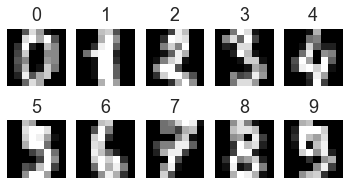

In [7]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('images/digits-generated.png', dpi=150)

In [8]:
# X = np.vstack([digits.data[digits.target==i] for i in range(10)])
# y = np.hstack([digits.target[digits.target==i] for i in range(10)])

X = digits.data
y = digits.target
digits_proj = TSNE(random_state=RS).fit_transform(X)   

In [9]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

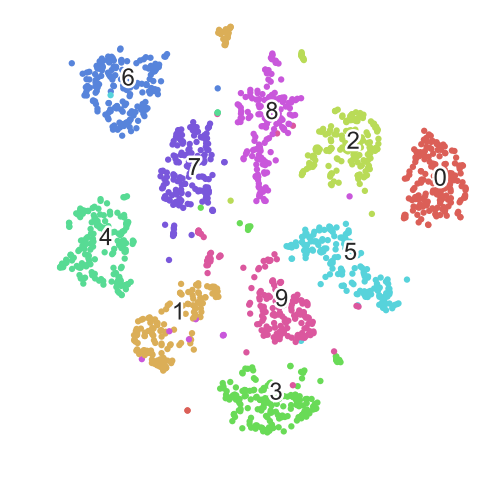

In [10]:
scatter(digits_proj, y)
plt.savefig('images/digits_tsne-generated.png', dpi=120)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
digits_proj1 = pca.fit_transform(X)

(<matplotlib.figure.Figure at 0xb853978>,
  <matplotlib.text.Text at 0x5d08cc0>])

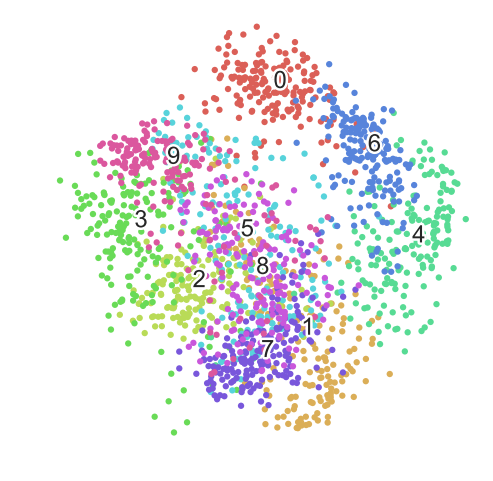

In [25]:
scatter(digits_proj1, y)

(<matplotlib.figure.Figure at 0x5fe0dd8>,
  <matplotlib.text.Text at 0x5f0ada0>])

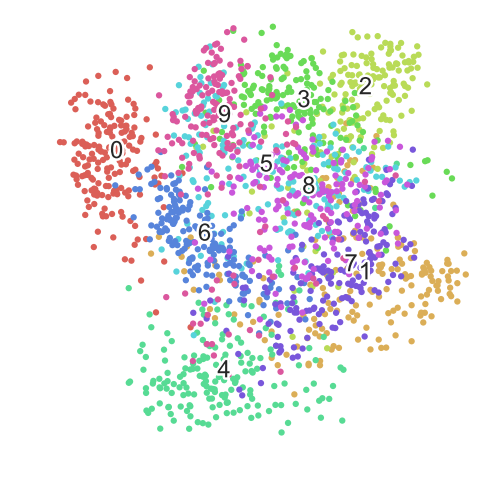

In [28]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2)
digits_proj2 = ipca.fit_transform(X)
scatter(digits_proj2, y)

(<matplotlib.figure.Figure at 0x5f8a0b8>,
  <matplotlib.text.Text at 0xc432978>])

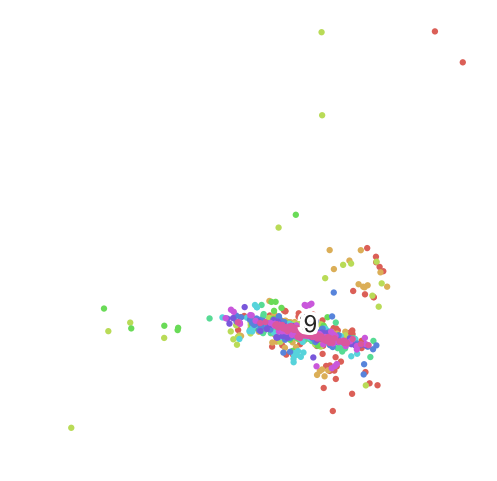

In [30]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=10, n_components=2)
digits_proj3 = kpca.fit_transform(X)
scatter(digits_proj3, y)